# Prediction and Analysis of Coronavirus (COVID19) | Priya Bannur PB 23

### Tasks covered:
1. Decision Tree 
2. Random Forests
3. Gaussian Naive Bayes
4. K Nearest Neighbors
5. Ensemble

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading data

In [2]:
d2 = pd.read_csv('data.csv')
print(d2.head())
print(d2.info())

        fever  bodypain  age  runnynose  diffbreath  infected
0   99.329862         0   26          1          -1         0
1   98.115263         1   61          1           0         1
2   99.918088         1   13          0          -1         0
3  101.344456         1   55          1           0         1
4  100.056678         1   37          0           1         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fever       1999 non-null   float64
 1   bodypain    1999 non-null   int64  
 2   age         1999 non-null   int64  
 3   runnynose   1999 non-null   int64  
 4   diffbreath  1999 non-null   int64  
 5   infected    1999 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 93.8 KB
None


In [3]:
d2.isnull().sum()

fever         0
bodypain      0
age           0
runnynose     0
diffbreath    0
infected      0
dtype: int64

### Visuaizing distribution of attributes

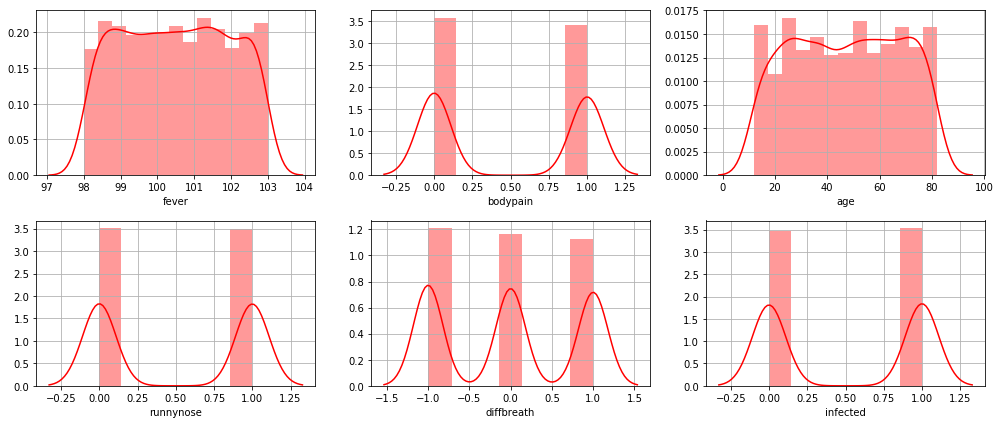

In [4]:
#checking the distribution

plt.rcParams['figure.figsize']=(14,6)

for i , var in enumerate(list(d2.columns.values)):
    plt.subplot(2,3,i+1)
    sns.distplot(d2[var] , color='r' , kde=True)
    plt.grid()
    plt.tight_layout()

# Modelling 

In [5]:
#storing values

X = d2.loc[: , d2.columns != 'infected']
y = d2.infected

#splitting data

X_train , X_test , y_train  ,y_test = train_test_split(X , y , test_size=0.2)

# Decision Tree Classification

In [6]:
@interact

def plot_tree(criteria = ['gini' , 'entropy'],
             split = ['best' , 'random'],
             depth = IntSlider(min=1 , max=30 , value=5 , continuous_update=False),
             min_split = IntSlider(min=1 , max=5, value=2 , continuous_update=False),
             min_leaf = IntSlider(min=1 , max=5 , value=1 , continuous_update=False )):
    
    estimator_tree = DecisionTreeClassifier(criterion=criteria,
                                           splitter = split,
                                           max_depth = depth,
                                           min_samples_split = min_split,
                                           min_samples_leaf = min_leaf)
    estimator_tree.fit(X_train , y_train)
    
    print(f'Decision Tree training accuracy: {accuracy_score(y_train , estimator_tree.predict(X_train))}')
    print(f'Decision Tree test accuracy: {accuracy_score(y_test , estimator_tree.predict(X_test))}')
    
    graph = Source(tree.export_graphviz(estimator_tree,
                                       out_file=None,
                                       feature_names= X_train.columns,
                                       class_names=['0','1'],
                                       filled=True))
    display(Image(data=graph.pipe(format='png')))
    
    return estimator_tree
    
    
    

interactive(children=(Dropdown(description='criteria', options=('gini', 'entropy'), value='gini'), Dropdown(de…

In [7]:
#Decision tree
dtree = DecisionTreeClassifier(criterion='gini', max_depth=None, splitter='best')

dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
dt=accuracy_score(y_test, y_pred)*100
print('\nDecision Tree Accuracy: {0:.2f}'.format(dt))


Decision Tree Accuracy: 54.50


# Random Forests Classification

In [8]:
@interact

def plt_tree_rf(criteria=['gini','entropy'],
               bootstrap=['True','False'],
               depth = IntSlider(min=1, max=30 , value=5, continuous_update=False),
               forests = IntSlider(min=5 , max=200 , value=10 , continuous_update=False),
               min_split = IntSlider(min=1 , max=5 , value=2 , continuous_update=False),
               min_leaf = IntSlider(min=1 , max=5 , value=1 , continuous_update=False)):
    
    estimator_rf = RandomForestClassifier(criterion=criteria,
                                         bootstrap=bootstrap,
                                         max_depth=depth,
                                         n_estimators=forests,
                                         min_samples_split = min_split,
                                         min_samples_leaf = min_leaf,
                                         n_jobs=-1)
    estimator_rf.fit(X_train , y_train)
    
    print(f'Random Forest Training Accuracy: {accuracy_score(y_train , estimator_rf.predict(X_train))} ')
    print(f'Random Forest Test Accuracy: {accuracy_score(y_test , estimator_rf.predict(X_test))}')
    
    num_tree = estimator_rf.estimators_[0]
    print('\nVisualizing Decision Tree:', 0)
    
    graph = Source(tree.export_graphviz(num_tree,
                                        out_file=None,
                                        feature_names=X_train.columns,
                                        class_names=['0', '1'],
                                        filled = True))
    
    display(Image(data=graph.pipe(format='png')))
    
    return estimator_rf
    


interactive(children=(Dropdown(description='criteria', options=('gini', 'entropy'), value='gini'), Dropdown(de…

In [9]:
#random forests tree

rf_tree = RandomForestClassifier(criterion='gini', max_depth=None, random_state=0)

rf_tree.fit(X_train,y_train)
y_pred = rf_tree.predict(X_test)

rf=accuracy_score(y_test, y_pred)*100
print('\nRandom Forests Accuracy: {0:.2f}'.format(rf))


Random Forests Accuracy: 52.50


# Gaussian NB

In [10]:
gnb = GaussianNB()

gnb.fit(X_train , y_train)

gnb=accuracy_score(y_test , gnb.predict(X_test))*100
print('NB accuracy= ', (gnb))


NB accuracy=  48.5


# KNN

In [11]:
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [12]:
kn=accuracy_score(y_test , knn.predict(X_test))*100
print('KNN accuracy= ', (kn))

KNN accuracy=  49.25


# Ensemble : Adaboost

In [16]:
#Model creation with 50 classifiers 
abc = AdaBoostClassifier(n_estimators=50, base_estimator=dtree)

#training adaboost model
model = abc.fit(X_train, y_train)

#predict the response for test dataset
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,

In [17]:
ada=metrics.accuracy_score(y_test, y_pred)*100
print("Adaboost Accuracy=", ada )

Adaboost Accuracy= 55.25


## Comparison between different classifiers

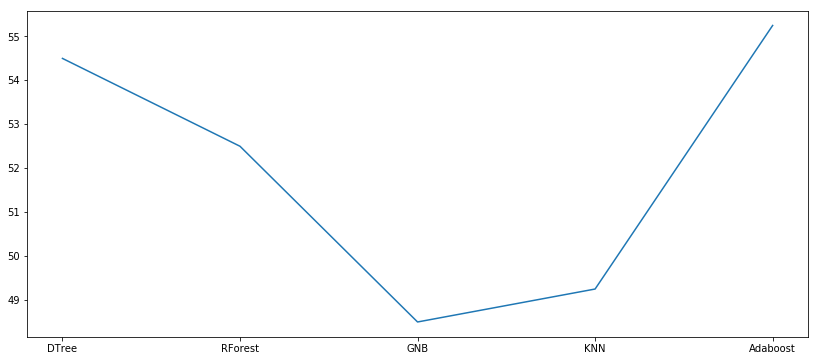

In [18]:
plt.plot(['DTree', 'RForest', 'GNB', 'KNN', 'Adaboost' ], [dt,rf,gnb,kn,ada])
plt.show()

# Conclusion

### The algorithms showed poor accuracy due to the fact that coronavirus can be asymptomatic, this theory was validated here.

This classification attempt is a strong evidence that coronavirus can be spread by silent spreaders as well. The silent spreaders are the people who are infected with coronavirus but show little to no symptoms of the disease. As a result, they go on with their daily lives, meeting friends, family members and strangers without realising that they are spreading the virus. Thus detecting symptoms is not enough to diagnose the virus.  

